# Module 1: Introduction to Exploratory Analysis 

## Overview

Welcome to the first notebook! In this notebook, we start exploring our [Kiva](https://www.kiva.org/) dataset. The goal of exploratory analysis is to summarize the main characteristics of a data set, with the belief that it may lead to new hypotheses that inform algorithm choice and experimentation. Exploratory analysis happens before formal modelling commences, and is extremely important for helping inform or sharpen your hypothesis.

So what is a hypothesis? At the initial stage a [hypothesis](http://study.com/academy/lesson/what-is-a-hypothesis-definition-lesson-quiz.html) is an educational guess that can be tested. The main goal of exploratory analysis is helping us arrive at better hypotheses.

## Step 1: Import and Merge Data

At the beginning of our notebooks we always import all the libraries we will use.

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import seaborn
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2847: FutureWarning: 
mpl_style h

You are using Jupyter notebook to run your code. it is an incredibly versatile tool and we can tailor the configurations to suit our preferences. For example, in the cell below we tell Jupyter to output the results of all commands in a cell (the default is only to output the results of the last command). For more interesting and incredibly useful Jupyter tricks take a look at [this](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) blog post. Using Jupyter shortcuts will help you work faster. Some valuable shortcuts have been put together in [this](http://www.math.umassd.edu/~ahausknecht/aohWebsiteSpring2017/examples/pythonExamples/downloads/docs/JuypterKeyboardShortcutsV1Sp2016.pdf) great pdf.

In [2]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We use a pandas command to tailor how the data is presented in the command below. There are 76 columns in our final Kiva dataset. The default panda settings hide some of the columns. We make all columns visible by setting the display to 80.

In [3]:
# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

We will use three main data sets: loans_full.csv, loans_details.csv, loans_partner_details.csv. These are all datasets KIVA makes publically available through its API. Wondering what an API is and how we pulled this data? Don't worry, you can learn all about it in the introduction to the KIVA APIs jupyter notebook we put together. It is available on the Delta Analytics GitHub.

Let's start by talking a little about each data set:

[loans_full](http://build.kiva.org/api#GET*|loans|search): contains all successful and expired loans made by KIVA in Kenya. KIVA does not make public loans that have defaulted in order to protect the privacy of those users.

[loans_details](http://build.kiva.org/api#GET*|loans|:ids): contains many of the coumns as loans full. However, it also contains a comprehensive description of the lender.

[loans_partner_details](http://build.kiva.org/api#GET*|partners|:ids): detailed performance metrics associated with each partner. Includes name of partner, rating of partner, amount lent to partner so far.


When we import all out data sets we will also import a data dictionary with definitions of each field. We talk about the data dictionary more below.

We set the path below, you should change this path to whatever folder you save the data you download from the google drive [here](https://drive.google.com/drive/folders/0BzVUQjOmkeDIYnhCalBkRVRNY1k?usp=sharing) into.

In [19]:
pwd

'/Users/anthonymiyoro/Documents/code/kivaMachineLearning'

In [20]:
data_path = '/Users/anthonymiyoro/Documents/code/kivaMachineLearning/data'

We import all three data sets in the cell below.

In [22]:
loans_full=pd.read_csv(data_path+'/loans_full.csv', low_memory=False)
loans_details=pd.read_csv(data_path+'/loans_details.csv', low_memory=False)
loan_partner_details=pd.read_csv(data_path+'/loans_partner_details.csv', low_memory=False)

We will also import our data dictionary which contains the definition for each of the fields in the final data set we will use. Reference the data dictionary for important context about the data. It may be easier to open it as a csv file in your desktop.

In [23]:
kiva_data_dictionary=pd.read_csv(data_path+'/kiva_data_dictionary.csv')

In [24]:
kiva_data_dictionary.head(100)

,original_data_set,field_name,field_name_final_dataset,description,additional_notes
0,loans_full,id,id,Unique identifier for a Kiva loan,Int
1,loans_full,name,name,The name of the borrower or group receiving th...,String
2,loans_full,gender,gender,The gender of the primary borrower OR majority...,possible values are male or female
3,loans_full,description,description,The description of the loan profile in English.,String
4,loans_full,status,status,All possible loan statuses,The public dataset does not reveal defaulted l...
5,loans_full,fundedAmount,fundedAmount,​The amount of the loan that has been purchase...,​The dollar amount in US
6,loans_full,basketAmount,basketAmount,The amount of the unfunded loan that is sittin...,​The dollar amount in US
7,loans_full,image,image,The picture for this loan profile,Image
8,loans_full,activity,activity,The activity is a structured categorization of...,A property of loan which is more descriptive t...
9,loans_full,sector,sector,The sector is a more general classification of...,"A sector is a broad category for a loan, e.g. ..."


In the cell below we perform a very important piece of code. We merge our datasets together in order to have a single final dataset. You will often have to merge/join datasets because many databases are relational databases. This means data is stored in tables that can be accessed and/or reassembled in many different ways (you can learn more [here](http://searchsqlserver.techtarget.com/definition/relational-database)). This has important benefits:
- allowing the flexible addition of new data without exsisting tables needing to be altered
- limiting the size of the data we store

Instead of having one single huge table in our database, we have many different tables that we can piece together as needed. This act of piecing together datasets is called a merge.


So when does it make sense to merge data?

In order to merge data, you need to have a columns in both datasets that have shared values. The columns you use to perform the join are called "join keys".

For example, the join key in both loans_full and loans_details is the id. This is the unique identifier for a loan and is shared between both datasets. In both datasets this is a unique key, which means we only expect a single row for every row (no duplicates).

The join key between loans_full and loans_partner_details is the partner_id. This is unique in loans_partner_details (every row is a unique partner_id), but is not unique in loans_full since many rows (loans) belong to the same partner. We can show that is not unique below by doing a value_count of the number of loans that belong to each partner_id in loans_full. We show the top 10 loan partners by size, you can see that the top loan partner '133' has been involved in 28,560 loans. When we join loans_full to loans_partner_details we can associate a name with each number identifier, and it will be a lot more interesting.



In [25]:
loans_full['partner_id'].value_counts().nlargest(10)

133.0    28560
164.0    21552
138.0    18101
156.0    18081
202.0    10356
142.0     5922
388.0     3210
203.0     2987
386.0     2388
6.0       1102
Name: partner_id, dtype: int64

Back to how to join! There are actually a few different types of merges, and the type of merge you choose depends upon what data you want to keep in your final data set.

There are two fantastic blog posts which do a great job explaining the different types of merges [here](http://www.datacarpentry.org/python-ecology-lesson/04-merging-data/) and [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/). We will reference the language in both posts below to add intuition.


**inner join** 

We will be using an inner join to join loans_full and loans_details because we only want the rows that match in both the original dataframes.

Inner joins yield a DataFrame that contains only rows where the value being joins exists in BOTH tables. The venn diagram below shows what is kept from both data frames.

![Visual of an inner join](module_1_images/inner_join.png)

Below we test it in python using our two datasets, loans_full and loan_difference.

loans_full and loan_difference contain many columns that are duplicates (exsist in both). There is no need to merge all the columns so we start out by figuring out what additional columns ARE in loans_details that ARE NOT in loans_full. We can see below that only borrower_count is additional, so we only merge these two columns.

In [26]:
additional_columns = loans_full.columns.difference(loans_details.columns).tolist() + ['id']
print(additional_columns)

['borrower_count', 'id']


Finally, we are ready to merge. We do not need to specify inner join since it is the default option. However, we do need to specify what are the join keys in each data set. In this case the naming is the same in both datasets, so we specify 'id' as the join key for the loans_details data set and 'id' for the loans_full data set.

In [27]:
df = loans_details.merge(loans_full[['borrower_count', 'id']], left_on='id', right_on='id')

You can take a look at the output below and confirm that borrow_count is now there. The new dataframe only contains loans that are in both loans_full and loans_details.

In [28]:
# The sample() function takes a random sample from the specified data frame. 
df.sample(3)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count
23480,23466,Clothing Sales,NaN,True,"[{'first_name': 'Esther', 'last_name': '', 'ge...",NaN,['en'],Esther is a married woman. She has three child...,NaN,NaN,NaN,500,2016-05-14T01:01:16Z,1052331,2146764,1,0,0,13,500,Kenya,KE,town,1 38,point,Mwea,Esther,138.0,[],2016-05-14T13:20:03Z,2016-04-14T13:20:03Z,Clothing,funded,"[{'name': 'user_favorite'}, {'name': '#Woman O...",50000.0,KES,2016-04-06T07:00:00Z,500,[],shared,0.1,lender,NaN,14,[],NaN,NaN,NaN,to buy more stock of clothes and bags.,NaN,NaN,NaN,NaN,1
106723,106665,Dairy,NaN,False,"[{'first_name': 'Anonymous', 'last_name': '', ...",NaN,['en'],NaN,NaN,NaN,NaN,675,2011-12-16T14:48:00Z,356319,726677,1,0,0,24,675,Kenya,KE,country,1 38,point,NaN,Anonymous,156.0,[],NaN,2011-11-14T20:30:20Z,Agriculture,funded,[],63600.0,KES,2011-10-12T07:00:00Z,675,[],shared,0.2,lender,NaN,22,[],NaN,Teresa Kramer,1940938.0,NaN,NaN,NaN,NaN,NaN,1
109227,109169,Farming,NaN,False,"[{'first_name': 'Anonymous', 'last_name': '', ...",NaN,['en'],NaN,NaN,NaN,NaN,500,2011-09-20T17:08:23Z,334806,726677,1,0,0,13,500,Kenya,KE,country,1 38,point,NaN,Anonymous Group,202.0,[],NaN,2011-09-20T04:50:04Z,Agriculture,funded,[],44800.0,KES,2011-09-27T07:00:00Z,500,[],shared,0.2,lender,NaN,15,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


**left join**

Now we perform a different type of merge in order to incorporate the loan_partner_details dataset. This merge is called a left join. The description below is directly from [this](http://www.datacarpentry.org/python-ecology-lesson/04-merging-data/) blog post.

Like an inner join, a **left join** uses join keys to combine two DataFrames. Unlike an inner join, a left join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the right DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the right DataFrame that do not have values for the join key(s) in the left DataFrame.

The venn diagram below shows what is kept from both data frames.

![Visual of an left join](module_1_images/left_join.png)

What this means is that we will keep our entire df dataframe, and we will only pull in data from loan_partner_details of the partner_id for partner_id listed in df. We will discard everything else. The code below goes through how this is done.

In the cell below, we rename all the columns in loans_partner_details with the prefix partner in order to avoid confusion once we merge. Then we take list all columns that are in loans_partner_details but not in df. These are the new columns we want to merge. Finally, we do a left join.

A left join is performed in pandas by calling the same merge function used for inner join, but using the how='left' argument.

In [29]:
new_names = [(i,'partner_'+i) for i in loan_partner_details.iloc[:, 1:].columns.values]
loan_partner_details.rename(columns = dict(new_names), inplace=True)

In [30]:
additional_columns = loan_partner_details.columns.difference(df.columns).tolist() + ['partner_id']
print(additional_columns)

['partner_average_loan_size_percent_per_capita_income', 'partner_charges_fees_and_interest', 'partner_countries', 'partner_currency_exchange_loss_rate', 'partner_default_rate', 'partner_default_rate_note', 'partner_delinquency_rate', 'partner_delinquency_rate_note', 'partner_image.id', 'partner_image.template_id', 'partner_loans_at_risk_rate', 'partner_loans_posted', 'partner_name', 'partner_portfolio_yield', 'partner_portfolio_yield_note', 'partner_profitability', 'partner_rating', 'partner_social_performance_strengths', 'partner_start_date', 'partner_status', 'partner_total_amount_raised', 'partner_url', 'partner_id']


In [31]:
df = df.merge(loan_partner_details[['partner_average_loan_size_percent_per_capita_income', 
                                    'partner_charges_fees_and_interest', 'partner_countries', 
                                    'partner_currency_exchange_loss_rate', 'partner_default_rate', 
                                    'partner_default_rate_note', 'partner_delinquency_rate', 'partner_delinquency_rate_note', 
                                    'partner_image.id', 'partner_image.template_id', 'partner_loans_at_risk_rate', 'partner_loans_posted', 
                                    'partner_name', 'partner_portfolio_yield', 'partner_portfolio_yield_note', 'partner_profitability', 
                                    'partner_rating', 'partner_social_performance_strengths', 'partner_start_date', 'partner_status', 
                                    'partner_total_amount_raised', 'partner_url', 'partner_id']], how='left', left_on='partner_id', right_on='partner_id') 


We have successully merged our dataframe and we are ready to get started with our exploratory analysis. For completness, below is a short description of the other join types you are likely to come across as you work with data more.

**full join**

![Visual of an full join](module_1_images/full_join.png)

A full join returns all rows from both datasets even if there is no match. All records will be kept so this join is used when we do not want to lose any data but want to see what rows match.
Invoked by passing how='outer' as an argument. 

**right join**

A right join is the same concept as the left join except it keeps all rows in the right data set rather than the left. Invoked by passing how='right' as an argument. 


We don't want to have to join all our datsets everytime we get started so we save our work to our data folder using the command below.

In [33]:
pwd

'/Users/anthonymiyoro/Documents/code/kivaMachineLearning'

In [38]:
df.to_csv('/Users/anthonymiyoro/Documents/code/kivaMachineLearning/df.csv')

## Step 2:  Data Cleaning & Creating New Variables

In [39]:
df=pd.read_csv(data_path+'/df.csv', low_memory=False)

In the cell below, we take a random sample of 3 rows to get a feel for the data.

In [40]:
df.sample(3)

,Unnamed: 0,Unnamed: 0.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
122176,122176,122118,Food Stall,NaN,False,"[{'first_name': 'Ndanu', 'last_name': '', 'gen...",NaN,['en'],"Ndanu is 40 years old, married to James Mwangi...",NaN,NaN,NaN,200,2010-03-27T02:10:36Z,189427,514730,1,0,0,8,200,Kenya,KE,town,-0.716667 36.433333,point,Naivasha,Ndanu,133.0,[],NaN,2010-03-27T00:00:04Z,Food,funded,[],15000.0,KES,2010-03-25T07:00:00Z,200,[],shared,0.2,lender,NaN,8,[],NaN,Hilary Hannon,NaN,To buy 3 sacks of potatoes.,NaN,NaN,NaN,NaN,1,34.9,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.089354,3.652283,NaN,8.017062,NaN,1495190.0,1.0,16.058249,30794.0,VisionFund Kenya,36.0,NaN,-1.7,2.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,11366975.0,http://www.visionfundkenya.co.ke/
14554,14554,14552,Farming,NaN,False,"[{'first_name': 'Peter', 'last_name': '', 'gen...",NaN,['en'],Peter is a very hardworking person. Thanks to ...,NaN,NaN,NaN,200,2016-11-05T17:49:56Z,1162404,2326570,1,0,0,4,200,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Peter,156.0,[],2016-11-07T15:00:06Z,2016-10-08T14:00:06Z,Agriculture,funded,"[{'name': '#Parent'}, {'name': '#Schooling'}]",20000.0,KES,2016-09-21T07:00:00Z,200,[],shared,0.1,lender,NaN,14,[],['Rural Exclusion'],Christine Haiss,1251749.0,to buy farm inputs such as fertilizers and see...,NaN,NaN,NaN,NaN,1,49.6,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.431935,2.575299,NaN,2.536684,NaN,1834079.0,1.0,24.200354,18150.0,Juhudi Kilimo,33.0,NaN,-7.1,2.0,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2010-01-15T20:20:17Z,active,7705925.0,http://www.juhudikilimo.com/
75538,75538,75488,Poultry,NaN,False,"[{'first_name': 'Anonymous', 'last_name': '', ...",NaN,['en'],NaN,NaN,NaN,NaN,725,2013-10-19T01:22:28Z,616901,726677,1,0,0,28,725,Kenya,KE,country,1 38,point,NaN,Anonymous,156.0,[],2013-11-12T21:40:04Z,2013-10-13T21:40:04Z,Agriculture,funded,[],60000.0,KES,2013-09-28T07:00:00Z,725,[],shared,0.1,lender,NaN,20,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,49.6,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.431935,2.575299,NaN,2.536684,NaN,1834079.0,1.0,24.200354,18150.0,Juhudi Kilimo,33.0,NaN,-7.1,2.0,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2010-01-15T20:20:17Z,active,7705925.0,http://www.juhudikilimo.com/


In [41]:
df.loc[df['name']=='Salome'].head(1)

,Unnamed: 0,Unnamed: 0.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
542,542,542,Clothing Sales,0.0,False,"[{'first_name': 'Salome', 'last_name': '', 'ge...",NaN,['en'],Salome is 40 years old and married with 3 chil...,NaN,NaN,NaN,0,NaN,1285843,2508289,1,0,0,0,200,Kenya,KE,town,-1.516667 37.266667,point,Machakos,Salome,386.0,[],2017-05-31T22:40:03Z,2017-05-01T22:40:03Z,Clothing,fundraising,[{'name': '#Parent'}],20000.0,KES,2017-03-29T07:00:00Z,200,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",shared,0.1,lender,Monthly,15,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Ginny Maceda,NaN,to buy more clothes to grow her business and s...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/


A big part of exploratory analysis involves data validation. This means gaining an understanding of the distribution of data, any potential data issues that can affect the quality of your model. As we learnt during our theory lesson, " Data preparation accounts for about 80% of the work of data scientists.” [source](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#27df67b36f63).

What does data cleaning look like:

1) Are my variables the right type?

Type is very important in Python programing, because it affects the types of functions you can apply to a series. There are a few different types of data you will see regularly (see [this](https://en.wikibooks.org/wiki/Python_Programming/Data_Types) link for more detail):
* **int** - a number with no decimal places. example: loan_amount field
* **float** - a number with decimal places. example: partner_id field
* **str** - str is short for string. This type formally defined as a sequence of unicode characters. More simply, string means that the data is treated as a word, not a number. example: sector
* **boolean** - can only be True or False. There is not currently an example in the data, but we will be creating a gender field shortly.
* **datetime** - values meant to hold time data. Example: posted_date

2) Is there missing data?

If we have missing data, is the missing data at random or not at random? If data is missing at random, the data distribution is still representative of the population. You can probably ignore the missing values as an inconvienience. However, if the data is missing systematically, any modeling you do may be biased. You should carefully consider the best way to clean the data, it may involve dropping some data. See [here](https://en.wikipedia.org/wiki/Missing_data) for additional information.

3) Sanity check the data, does it match what you expected to find:
- is the range of values what you would expect. For example, are all loan_amounts above 0.
- do you have the number of rows you would expect
- is your data for the date range you would expect. For example, is there a strange year in the data like 1880.
- are there unexpected spikes when you plot the data over time

### Are my variables the right type?

Let's check the type of our variables using the examples we in the cell above.

In [42]:
type_example=df[['loan_amount','partner_id', 'sector','posted_date']]

In [43]:
type_example.sample(3)

,loan_amount,partner_id,sector,posted_date
18002,500,386.0,Retail,2016-08-07T14:50:02Z
73919,1175,257.0,Personal Use,2013-11-14T00:20:03Z
27950,450,133.0,Food,2016-02-02T19:10:02Z


In [44]:
type_example['loan_amount'].dtype
type_example['partner_id'].dtype
type_example['sector'].dtype
type_example['posted_date'].dtype

dtype('int64')

dtype('float64')

dtype('O')

dtype('O')

Immediately, we notice we have an issue. Type 'O' means object which in the pandas world means a string. This makes sense for the sector field but not for the posted_date field. We want pandas to treat this field as a datetime field, we will have to tell pandas to convert it. This is annoying but important because we will be ploting time series charts. We need python to recognize posted_date as a date in order to apply some of the operations necessary.

We use the panda function `to_datetime`, which converts our format from object to datetime. You can run the `.dtype` command above to verify we have converted successfully. We also want to create a YY-MM variable for each, which will allow us to more easily aggregate our data later in the module.

In [45]:
df['posted_datetime'] = pd.to_datetime(df['posted_date'])
df['planned_expiration_datetime'] = pd.to_datetime(df['planned_expiration_date'])
df['funded_datetime'] = pd.to_datetime(df['funded_date'])
df['dispursal_datetime'] = pd.to_datetime(df['terms.disbursal_date'])
df['number_of_loans']=1

In [46]:
df['posted_date']=df['posted_datetime'].dt.date
df['planned_expiration_date']=df['planned_expiration_datetime'].dt.date
df['funded_date']=df['funded_datetime'].dt.date
df['dispersal_date']=df['dispursal_datetime'].dt.date
df['posted_year']=df['posted_datetime'].dt.year

We can check if we were successful by checking the type again. We were successful!

In [47]:
df['posted_datetime'].head(1)
df['posted_datetime'].dtype

0   2017-05-09 00:40:03
Name: posted_datetime, dtype: datetime64[ns]

dtype('<M8[ns]')

Now that we have successfully manipulated our data fields we can plot the time range of our data. This is an important piece of sanity checking because if we see an unexpected year, or big spikes in one year we should be suspicious about the quality of our data.

,number_of_loans,Date
0,511,2006
1,2143,2007
2,384,2008
3,1730,2009
4,6050,2010
5,13182,2011
6,16054,2012
7,16228,2013
8,19222,2014
9,22594,2015


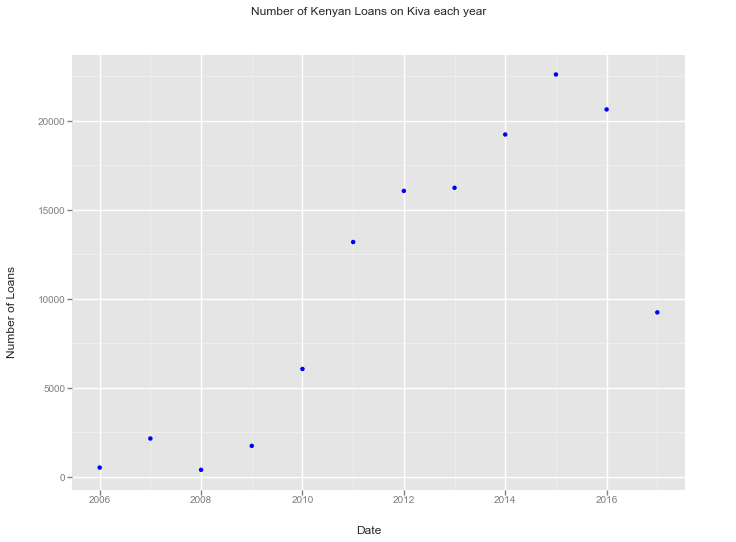

<ggplot: (-9223372036531828778)>

In [48]:
ts=df[['posted_datetime','number_of_loans']]
ts = ts.set_index(['posted_datetime'])
ts=ts.groupby(ts.index.year).sum()
ts['Date'] = ts.index
ts.reset_index(drop=True)

ggplot(ts , aes(x = 'Date', y = 'number_of_loans')) + geom_point(color = "blue") + \
ggtitle("Number of Kenyan Loans on Kiva each year") + xlab("Date") + ylab("Number of Loans")

In the chart above we can see that we have loan data from 2006 through to 2017. This seems reasonable and means KIVA has been lending in Kenya for 11 years. We also see that although the number of loans has grown each year there is a dip in 2017. However, this isn't that suspicious because remember that we are only in May, so the total volume will likely increase by December. 

,loan_amount,Date
0,274975,2006
1,1172000,2007
2,364500,2008
3,788150,2009
4,2985625,2010
5,5788500,2011
6,7163925,2012
7,8973675,2013
8,9196175,2014
9,9638775,2015


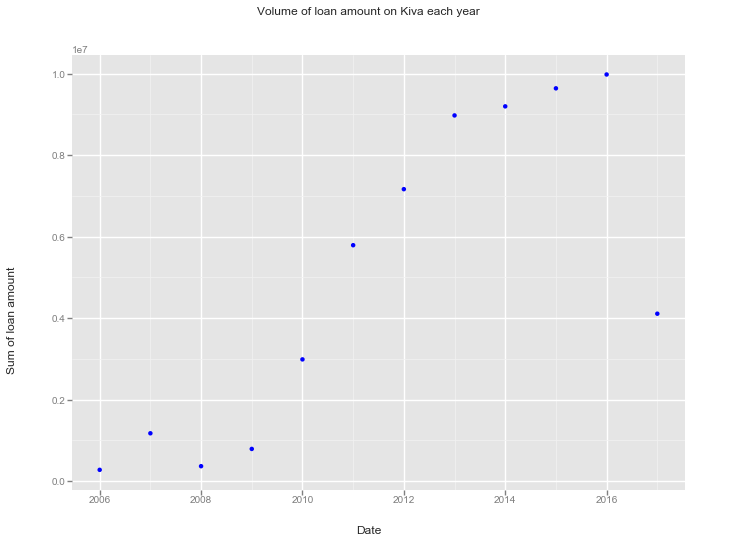

<ggplot: (-9223372036572286895)>

In [49]:
ts=df[['posted_datetime','loan_amount']]
ts = ts.set_index(['posted_datetime'])
ts=ts.groupby(ts.index.year).sum()
ts['Date'] = ts.index
ts.reset_index(drop=True)

ggplot(ts , aes(x = 'Date', y = 'loan_amount')) + geom_point(color = "blue") + \
ggtitle("Volume of loan amount on Kiva each year") + xlab("Date") + ylab("Sum of loan amount")

We see a similar patten in the sum of dollars loaned. It mimics the distribution of the number of loans which is a good sign.

### Do I have missing values?

Remember when we used a left join to merge in the partner data. That means we could have null (missing) values in our partner_id field. We check this in the cell below and find that we have 9,642 loans that are missing. Let's investigate and try and understand whether the data is missing at random or systematically missing.

In [50]:
len(df.index)-df['partner_id'].count()

9642

In [51]:
null_partner_id=df.loc[df['partner_id'].isnull()]

In [52]:
len(null_partner_id.index)

9642

In [53]:
null_partner_id.head(2)

,Unnamed: 0,Unnamed: 0.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,...,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url,posted_datetime,planned_expiration_datetime,funded_datetime,dispursal_datetime,number_of_loans,dispersal_date,posted_year
36064,36064,36048,Health,NaN,False,"[{'first_name': 'Doroffine', 'last_name': '', ...",0.01,['en'],"I grew up in Kitui county, was faced with many...",NaN,NaN,NaN,225,2015-09-04,1090127,2208140,1,0,0,6,225,Kenya,KE,country,1 38,point,NaN,Doroffine,NaN,[],2015-10-17,2015-09-02,Health,funded,[],20000.0,KES,2015-09-14T11:07:00Z,225,[],...,6,[],NaN,NaN,NaN,"buy medicines, stethoscope, glucometer and exa...",NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-02 17:52:12,2015-10-17 10:52:11,2015-09-04 02:44:28,2015-09-14 11:07:00,1,2015-09-14,2015
36068,36068,36052,Agriculture,NaN,False,"[{'first_name': 'Brenda Bugutsa', 'last_name':...",0.01,['en'],I grew up in Vihiga county Western Kenya in a ...,NaN,NaN,NaN,225,2015-09-03,1090116,2208117,1,0,0,6,225,Kenya,KE,country,1 38,point,NaN,Brenda Bugutsa,NaN,[],2015-10-17,2015-09-02,Agriculture,funded,[],20000.0,KES,2015-09-10T16:23:00Z,225,[],...,6,[],NaN,NaN,NaN,purchase more cereals stocks and charcoal sto...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-02 17:44:11,2015-10-17 10:44:09,2015-09-03 15:10:11,2015-09-10 16:23:00,1,2015-09-10,2015


,number_of_loans,Date
0,16,2011
1,359,2012
2,1077,2013
3,4725,2014
4,3465,2015


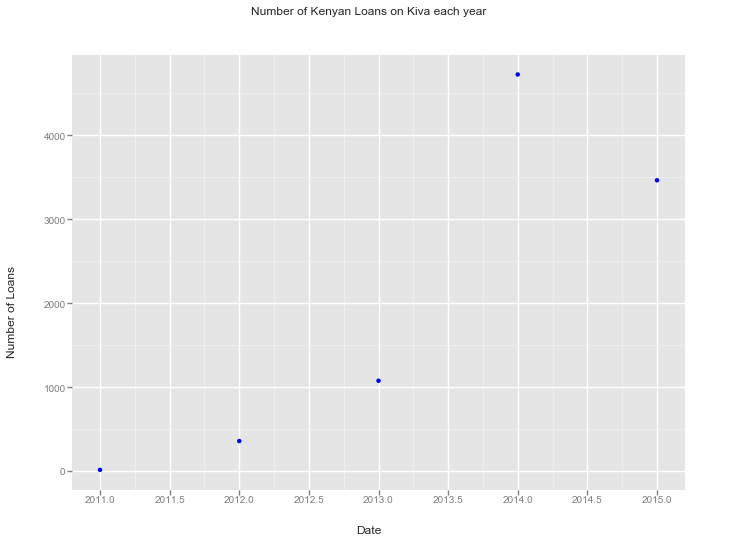

<ggplot: (340484279)>

In [54]:
ts=null_partner_id[['posted_datetime','number_of_loans']]
ts = ts.set_index(['posted_datetime'])
ts=ts.groupby(ts.index.year).sum()
ts['Date'] = ts.index
ts.reset_index(drop=True)

ggplot(ts , aes(x = 'Date', y = 'number_of_loans')) + geom_point(color = "blue") + \
ggtitle("Number of Kenyan Loans on Kiva each year") + xlab("Date") + ylab("Number of Loans")

It seems that the number of loans peaked in 2014, and has decreased. All of the loans issued in the second half of 2015, 2016, 2017 have a partner. This tells us these values are not missing at random, they are more likely to occur in data before June 2015, and are most likely to occur in the first half of 2014. We should probably just drop data with the partner_id missing. We do so below using the notnull() function which checks if the field is populated.

In [55]:
df=df.loc[df['partner_id'].notnull()]

As a sanity check that our filtering was correctly done we check the new number of rows. It makes sense!

In [56]:
len(df.index)

118316

### Additional Sanity Checks

**Does the dataset have the number of rows you would expect?**

In the command below we find out the number of loans and number of columns by using the function shape. You can also use len(df.index) to find the number of rows.

In [57]:
print('There are %d observations and %d features' % (df.shape[0],df.shape[1]))

There are 118316 observations and 84 features


This tells us there are 127,958 observations and 84 features. We learnt in the theory lesson that each row is an observation and each column is a potential feature. 127,000 matches with what we expect based upon our conversations with Kiva. This is a very healthy sample size for applying machine learning algorithms.

### Descriptive statistics of the dataset

In the theory part of the lesson, we learnt about mean, frequency and percentiles as a powerful way to understand teh distribution of the data. If you are unfamiliar with these terms or need a refresher [this](https://www.mathsisfun.com/data/frequency-grouped-mean-median-mode.html) overview should be helpful.The describe command below provides key summary statistics for each numeric column.

In [58]:
print(df.describe())

          Unnamed: 0   Unnamed: 0.1  basket_amount  \
count  118316.000000  118316.000000     944.000000   
mean    64433.371843   64398.230239       0.185381   
std     38178.638548   38157.158427       2.145937   
min         0.000000       0.000000       0.000000   
25%     29578.750000   29564.750000       0.000000   
50%     66559.500000   66517.500000       0.000000   
75%     98296.250000   98238.250000       0.000000   
max    127957.000000  127899.000000      25.000000   

       currency_exchange_loss_amount  funded_amount            id  \
count                   15690.000000  118316.000000  1.183160e+05   
mean                        7.017447     473.439771  7.096035e+05   
std                        15.655207     676.663803  3.412929e+05   
min                         0.010000       0.000000  2.510000e+02   
25%                         1.220000     250.000000  4.202852e+05   
50%                         3.490000     350.000000  6.975760e+05   
75%                         8.

In order to get the same summary statistics for categorical columns (string) we need to do a little data wrangling. The first line of code filters for all columns that are a data type object. As we know from before this means they are considered to be a string. The final row of code provides summary statistics for these character fields.

In [59]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].head(1)
df[categorical].describe()

,activity,borrowers,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_date,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_currency,terms.disbursal_date,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.nonpayment,terms.repayment_interval,terms.scheduled_payments,themes,translator.byline,use,video.title,video.youtubeId,partner_charges_fees_and_interest,partner_countries,partner_name,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_url,dispersal_date
0,Farming,"[{'first_name': 'Evaline', 'last_name': '', 'g...",['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,NaN,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,[],2017-06-08,2017-05-09,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",KES,2017-04-03T07:00:00Z,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",shared,lender,Monthly,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Julie Keaton,to purchase more tea leaves to sell to the tea...,NaN,NaN,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",Kenya ECLOF,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,http://www.eclof-kenya.org/,2017-04-03


,activity,borrowers,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_date,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_currency,terms.disbursal_date,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.nonpayment,terms.repayment_interval,terms.scheduled_payments,themes,translator.byline,use,video.title,video.youtubeId,partner_charges_fees_and_interest,partner_countries,partner_name,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_url,dispersal_date
count,118316,118316,118316,113988,3,3,4,112704,118316,118316,118316,118316,118316,110407,118316,118316,93403,118316,118316,118316,118316,118316,118316,118316,118316,118316,944,118316,29014,82362,113989,76,76,118316,118316,118316,118316,113754,118316,118316,114249,118316
unique,149,29987,4,113859,3,3,4,3452,1,1,2,47,1,1249,16047,1,1860,3174,15,3,5426,2,5413,736,3,2,3,277,27,425,58864,72,74,2,11,52,9,16,52,3,34,3081
top,Farming,"[{'first_name': 'Anonymous', 'last_name': '', ...",['en'],"Hello Kiva Community! <br /><br />Meet Jane, w...",The person appearing in the photo is Agnes. Sh...,Irine has a small farm in Sigowet village wher...,Joyce is a married woman. She has 6 children. ...,2016-03-08,Kenya,KE,town,1 38,point,Likoni,Anonymous,[],2014-03-26,2014-02-24,Agriculture,funded,[],KES,2017-02-01T08:00:00Z,[],shared,lender,Monthly,[],['Rural Exclusion'],Tim Gibson,to purchase a solar light and gain access to c...,Kiva Borrower SANITA from Kenya,6dWFtYShzBk,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",VisionFund Kenya,3.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,http://www.visionfundkenya.co.ke/,2017-02-01
freq,26243,2420,118306,5,1,1,1,413,118316,118316,110407,77254,118316,5035,3680,118316,621,621,45638,112704,65318,115076,2498,117372,113783,115735,622,117372,15663,6917,1405,2,2,117376,106639,28570,39681,46681,28570,104271,28570,2498


## Step 3: Exploratory Analysis

## Step 3 a: What sectors get the most funding?

The pie chart below shows that agriculuture and food have the most loans in Kenya.

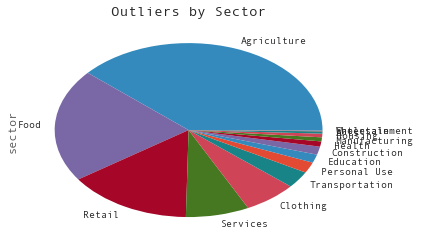

In [60]:
df['sector'].value_counts().plot(kind='pie',title='Outliers by Sector')

What is the average loan amount for each sector? We see that Agriculture has the largest average loan value.

In [61]:
df.groupby('sector')['loan_amount'].mean()

sector
Agriculture        563.734169
Arts               406.397638
Clothing           429.577926
Construction       439.261651
Education          876.895799
Entertainment      476.286765
Food               379.565182
Health            1031.538797
Housing            512.875000
Manufacturing      546.231721
Personal Use       242.357294
Retail             490.601514
Services           452.595146
Transportation     514.767473
Wholesale          590.485075
Name: loan_amount, dtype: float64

We can also visualize this as a bar chart.

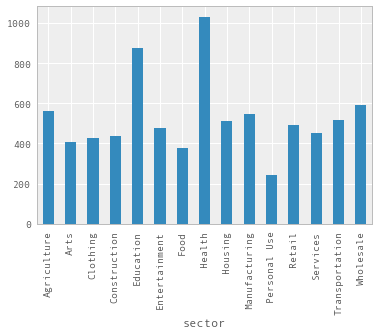

In [62]:
df.groupby('sector')['loan_amount'].mean().plot(kind="bar")

Below, we change out metric of interest to the total sum of dollars invested. Agriculture still comes out on top.

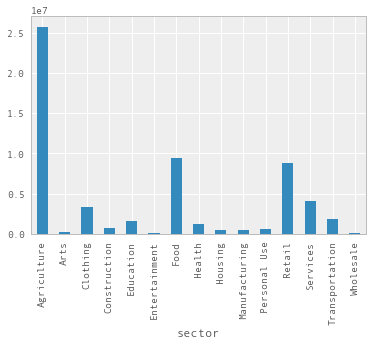

In [63]:
df.groupby('sector')['loan_amount'].sum().plot(kind="bar")

We can also look at the distribution of loans by sector.

There are 149 different activities

 Just looking at the top 15 activites


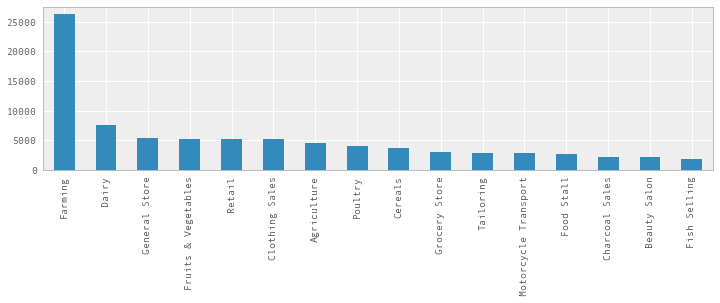

In [64]:
print("There are %d different activities" % df.activity.value_counts().size)
print("\n Just looking at the top 15 activites")
df.activity.value_counts()[0:16].plot(kind='bar',figsize=(12,3))

Since we know agriculture loans tend to be larger on average, it would be interesting to see if they tend to have more borrowers.

borrower_count
1     105297
2        847
3        656
4        587
5        762
6        622
7        724
8       1044
9       1004
10      1432
11      1124
12      1096
13       855
14       754
15       615
16       475
17        51
18        32
19        71
20       135
21        34
22        17
23        15
24        20
25        15
26         8
27         2
28         3
29         1
30         2
31         3
32         3
33         2
34         1
37         1
39         1
40         1
41         1
42         1
45         1
46         1
dtype: int64


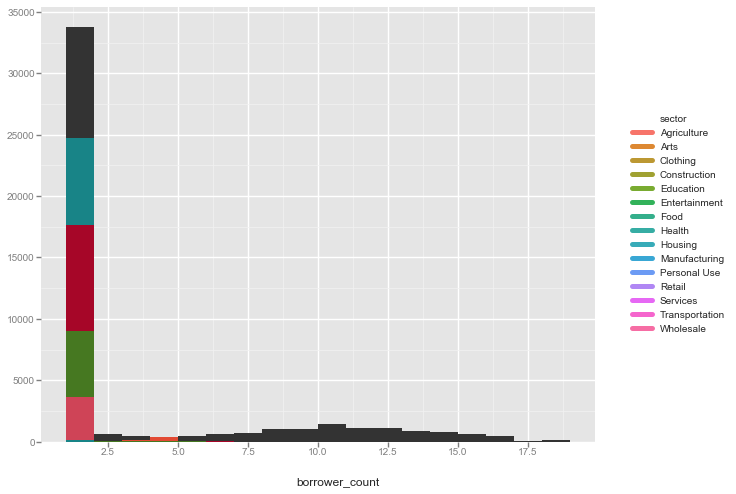

<ggplot: (-9223372036532154417)>

In [65]:
print(df.groupby("borrower_count").size());
ggplot(df[df['borrower_count'] < 20], aes(x='borrower_count', fill='sector')) +\
    geom_histogram(binwidth=1)

We see that the bulk of all loans only have a single borrower, but agriculture loans tends to be outliers and much more likely to have multiple borrowers.

## Step 3 b: What amount do people lend on average?

The chart below shows a strong relationship between loan amount and number of lenders. This suggests to us that as the loan amount goes up the amount donated by any lender does not. Instead larger loans are simply fulfiled by more individual lenders. This makes sense given our understanding of KIVAs platform, since the majority of lenders loan the minimum $25.00. 

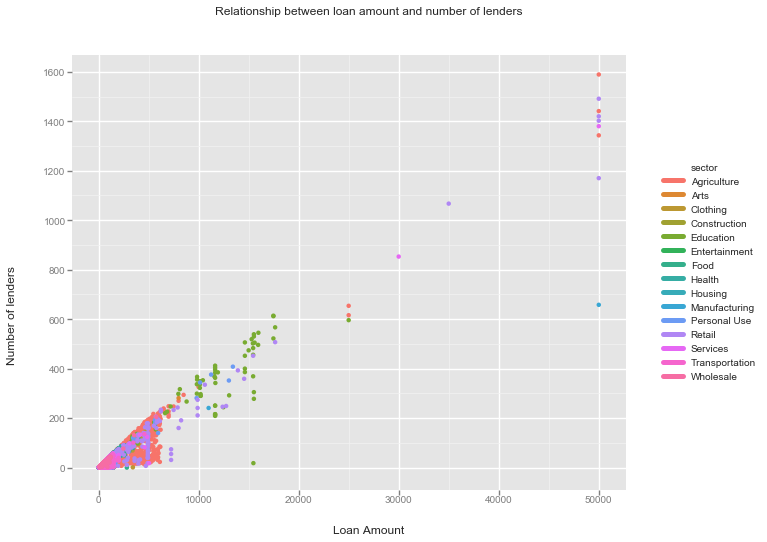

<ggplot: (279558306)>

In [66]:
ggplot(df , aes(x = 'loan_amount', y = 'lender_count', color='sector')) + geom_point() + \
ggtitle("Relationship between loan amount and number of lenders") + xlab("Loan Amount") + ylab("Number of lenders")

That might suggest that larger loans are more difficult to fulfill, since they tend on average to require more lenders. Let's take a look. We start by plotting all loans. We can already see below that the chart is skewed by outliers. 

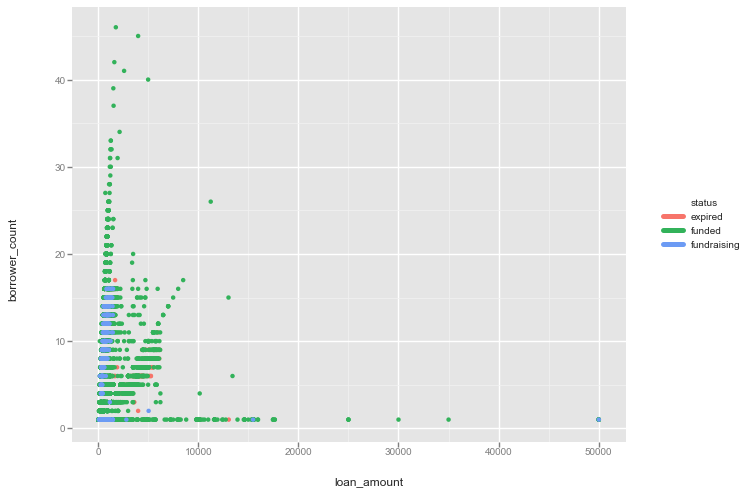

<ggplot: (-9223372036531828967)>

In [67]:
ggplot(loans_full, aes(x='loan_amount', y = 'borrower_count', color='status')) + \
    geom_point() 

##Hugely skewed by a few big loans

We limit our data set to all loans below $5000.00.

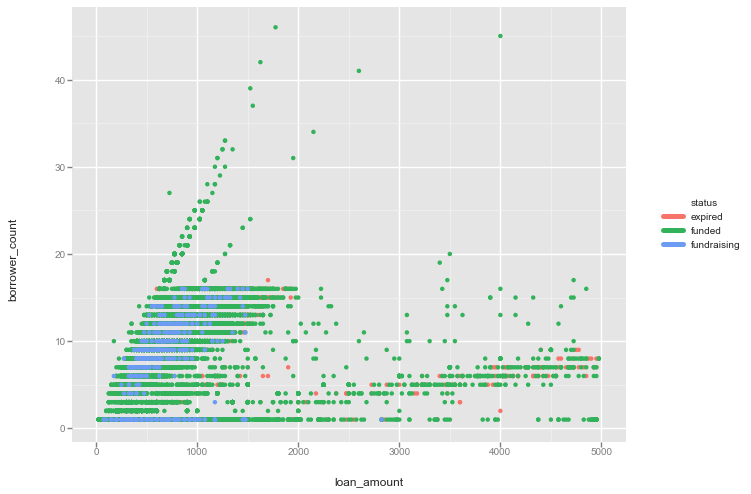

<ggplot: (331276117)>

In [68]:
ggplot(df.query("loan_amount < 5000"), aes(x='loan_amount', y = 'borrower_count', color='status')) + \
    geom_point() 
    
## Expired loans tend to be bigger loans with fewer borrowers

In this chart it becomes clear that a loan is more likely to expire when it is a higher loan amount.

## Further practice

We have suggested some topics below for exploratory analysis. Try and attempt at least one topic before next class. We will share our own research at the next class, but feel free to share visualizations or interesting observations in slack.

## Step 3 b: Who are the biggest lending partners?


In [84]:
print ('First we list all the available partners and the amount that they lend respctively.')

First we list all the available partners and the amount that they lend respctively.


In [81]:
df.groupby('partner_name')['loan_amount'].mean()

partner_name
Action Now: Kenya (ANK)                                                       620.975610
Asante Kenya Foundation                                                       327.631579
Barefoot Power                                                              50000.000000
BrazAfric                                                                    1358.333333
Burn Manufacturing                                                           4161.363636
Digital Divide Data (DDD)                                                     500.000000
Ebony Foundation (Eb-F)                                                       837.905162
EcoZoom                                                                      4177.500000
Evidence Action                                                              1541.329480
Faulu Kenya                                                                   506.344985
Fledge                                                                      11000.000000
Grameen 

In [94]:
print ('We can then display the top 10 loan givers')
print ('We use the .nlargest() function to display the largest loan givers')

We can then display the top 10 loan givers
We use the .nlargest() function to display the largest loan givers


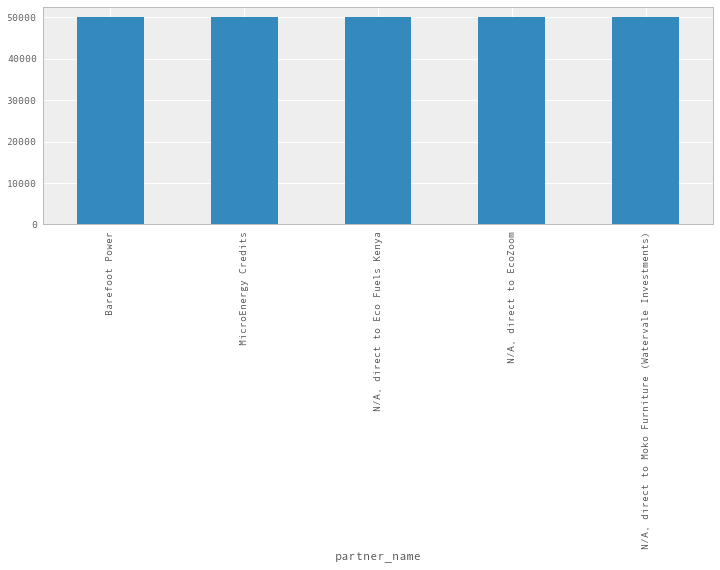

In [95]:
df.groupby('partner_name')['loan_amount'].mean().nlargest().plot(kind='bar',figsize=(12,4))

## Step 3 c: How many loans do not get funded? What are some qualities of loans that expire?

In [97]:
print ("First we need to see all the loans that dindn't get funded.")

First we need to see all the loans that dindn't get funded


In [102]:
print ("Below we can see the statuses for all loans given.")
df.groupby('id')['status'].first()

Below we can see the statuses for all loans given.


id
251             funded
252             funded
253             funded
254             funded
255             funded
285             funded
286             funded
287             funded
288             funded
289             funded
290             funded
291             funded
292             funded
293             funded
295             funded
296             funded
297             funded
298             funded
300             funded
302             funded
303             funded
304             funded
305             funded
307             funded
337             funded
342             funded
343             funded
344             funded
345             funded
399             funded
              ...     
1291328    fundraising
1291347    fundraising
1291355    fundraising
1291369         funded
1291387    fundraising
1291389    fundraising
1291399    fundraising
1291404         funded
1291407    fundraising
1291416    fundraising
1291421    fundraising
1291423    fundraising
1291444 

The loans that are not funded are marked as expired.


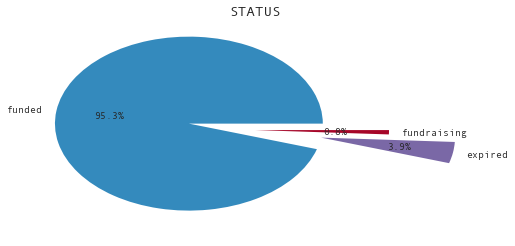

In [109]:
print('The loans that are not funded are marked as expired.')
explode = (0.5, 0.5, 0, )  # explode 1st and 2nd slice
df['status'].value_counts().plot(kind='pie', title='STATUS', autopct='%1.1f%%',  explode=explode)

## Step 3 d: How does the loan amount vary by location?

## Step 3 e: How does the average loan amount vary over time

## Step 3 f: Are women asking for lower loan amounts than men?